In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

### Đọc và chia dữ liệu thành X, y


In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.shape

(1025, 14)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Chuẩn hoá lại giá trị, tránh gây tràn số và để đồng nhất khoảng giá trị của features

In [5]:
num_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
scaler = StandardScaler()

data[num_features] = scaler.fit_transform(data[num_features])

In [6]:
X = data.drop("target", axis=1)
y = data["target"]

In [7]:
X = X.values
X

array([[-0.26843658,  1.        ,  0.        , ...,  2.        ,
         2.        ,  3.        ],
       [-0.15815703,  1.        ,  0.        , ...,  0.        ,
         0.        ,  3.        ],
       [ 1.71659547,  1.        ,  0.        , ...,  0.        ,
         0.        ,  3.        ],
       ...,
       [-0.81983438,  1.        ,  0.        , ...,  1.        ,
         1.        ,  2.        ],
       [-0.4889957 ,  0.        ,  0.        , ...,  2.        ,
         0.        ,  2.        ],
       [-0.04787747,  1.        ,  0.        , ...,  1.        ,
         1.        ,  3.        ]], shape=(1025, 13))

In [8]:
y = y.values.reshape(-1, 1)

In [9]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], shape=(1025, 1))

### Xây dựng hàm sigmoid


In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Xây dựng hàm dự đoán


In [11]:
def predict(features, weights):
    z = np.dot(features, weights)
    return sigmoid(z)

### Xây dựng hàm phân lớp


In [12]:
def classify(predictions):
    classes = [1 if prediction >= 0.5 else 0 for prediction in predictions]
    return classes

### Xây dựng hàm mất mát


In [13]:
def cost_function(
    features,
    weights,
    labels
):
    num_samples = len(labels)
    predictions = predict(features, weights)  # y_hat, còn labels là y
    cost_class1 = -labels * np.log(predictions)
    cost_class2 = -(1 - labels) * np.log(1 - predictions)
    cost = cost_class1 + cost_class2  #
    cost = cost.sum() / num_samples

    return cost

### Cập nhật trọng số


In [14]:
def update_weights(features, weights, labels, learning_rate):
    num_samples = len(labels)
    y_predictions = predict(features, weights)
    gradient = np.dot(features.T, y_predictions - labels) / num_samples
    weights -= learning_rate * gradient
    return weights

### Xây dựng mô hình


In [15]:
def train(X_bar, labels, num_epochs, learning_rate):
    d = X_bar.shape[1]
    weights = np.zeros((d, 1))

    losses = []
    best_weights = weights
    min_loss = float("inf")
    best_epoch = 0

    for epoch in range(num_epochs):
        weights = update_weights(X_bar, weights, labels, learning_rate)
        loss = cost_function(X_bar, weights, labels)
        losses.append(loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, loss: {loss}")

        if loss < min_loss:
            min_loss = loss
            best_weights = weights.copy()
            best_epoch = epoch

    return best_epoch, best_weights, losses

In [16]:
num_epochs = 20000
learning_rate = 0.01
X_bar = np.c_[np.ones((X.shape[0], 1)), X]

best_epoch, best_weights, losses = train(X_bar, y, num_epochs, learning_rate)

Epoch 0, loss: 0.6907563006358031
Epoch 100, loss: 0.5426889412408231
Epoch 200, loss: 0.4819722379412976
Epoch 300, loss: 0.45086622910694607
Epoch 400, loss: 0.43228402236324676
Epoch 500, loss: 0.4199880435121268
Epoch 600, loss: 0.41124999919301297
Epoch 700, loss: 0.404708242689863
Epoch 800, loss: 0.3996136181489816
Epoch 900, loss: 0.39552210109734665
Epoch 1000, loss: 0.3921546224102875
Epoch 1100, loss: 0.3893272682273625
Epoch 1200, loss: 0.386913993707203
Epoch 1300, loss: 0.38482552778639656
Epoch 1400, loss: 0.38299685277918577
Epoch 1500, loss: 0.381379465192846
Epoch 1600, loss: 0.3799364216395756
Epoch 1700, loss: 0.37863906935573716
Epoch 1800, loss: 0.37746482971151457
Epoch 1900, loss: 0.3763956592604573
Epoch 2000, loss: 0.37541695814638665
Epoch 2100, loss: 0.3745167808127502
Epoch 2200, loss: 0.37368525532082497
Epoch 2300, loss: 0.372914149392069
Epoch 2400, loss: 0.37219654145993747
Epoch 2500, loss: 0.37152656808358364
Epoch 2600, loss: 0.3708992277092413
Epoch

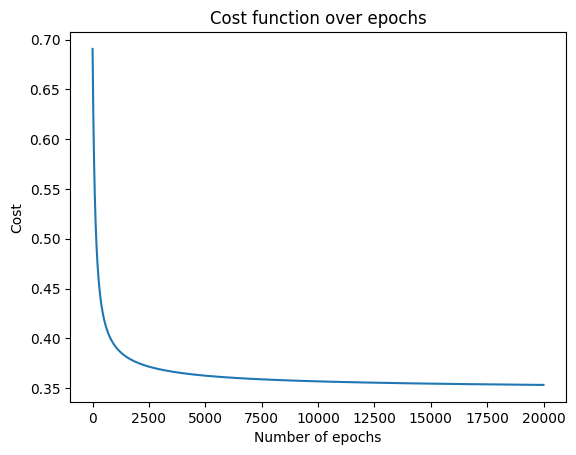

In [17]:
# Vẽ đồ thị biểu diễn cost
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Number of epochs")
plt.ylabel("Cost")
plt.title("Cost function over epochs")
plt.show()

### Thay đổi số epoch (Early Stopping)

In [19]:
num_epochs = 10000
best_epoch, best_weights, losses = train(X_bar, y, num_epochs, learning_rate)

Epoch 0, loss: 0.6907563006358031
Epoch 100, loss: 0.5426889412408231
Epoch 200, loss: 0.4819722379412976
Epoch 300, loss: 0.45086622910694607
Epoch 400, loss: 0.43228402236324676
Epoch 500, loss: 0.4199880435121268
Epoch 600, loss: 0.41124999919301297
Epoch 700, loss: 0.404708242689863
Epoch 800, loss: 0.3996136181489816
Epoch 900, loss: 0.39552210109734665
Epoch 1000, loss: 0.3921546224102875
Epoch 1100, loss: 0.3893272682273625
Epoch 1200, loss: 0.386913993707203
Epoch 1300, loss: 0.38482552778639656
Epoch 1400, loss: 0.38299685277918577
Epoch 1500, loss: 0.381379465192846
Epoch 1600, loss: 0.3799364216395756
Epoch 1700, loss: 0.37863906935573716
Epoch 1800, loss: 0.37746482971151457
Epoch 1900, loss: 0.3763956592604573
Epoch 2000, loss: 0.37541695814638665
Epoch 2100, loss: 0.3745167808127502
Epoch 2200, loss: 0.37368525532082497
Epoch 2300, loss: 0.372914149392069
Epoch 2400, loss: 0.37219654145993747
Epoch 2500, loss: 0.37152656808358364
Epoch 2600, loss: 0.3708992277092413
Epoch

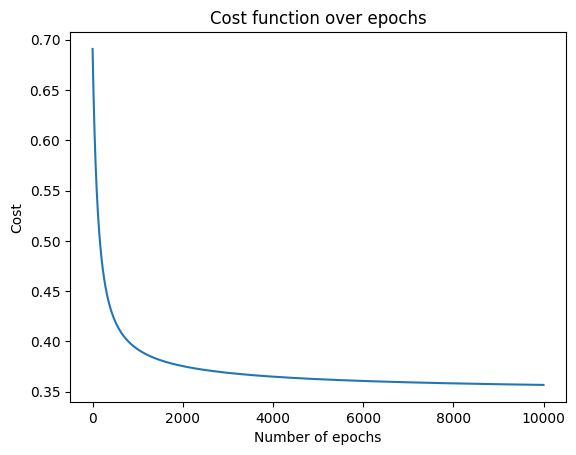

In [ ]:
# Vẽ đồ thị biểu diễn cost
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Number of epochs")
plt.ylabel("Cost")
plt.title("Cost function over epochs")
plt.show()

### Tính toán độ chính xác

In [20]:
y_pred = predict(X_bar, best_weights)
y_pred = classify(y_pred)

n = X_bar.shape[0]
correct_records = 0
for i in range(n):
    if y_pred[i] == y[i]:
        correct_records += 1

accuracy = correct_records / n
best_epoch, accuracy

(9999, 0.8673170731707317)